Задание 2.
Пункт 1. Подключение к БД из python 

Для начала нужно выполнить шаги из инстркукции (установить на комрьютер драйвер pyodbc, создлать нового пользователя в SQL Server, а также создать в SQL server таблицу [HW].[dbo].[information]). После этого можно запускать данный скрипт. 
В следующей команде необходимо заменить имя сервера, название базы данных, имя пользователя и пароль.

In [1]:
import pandas as pd
import pyodbc 
server = 'DESKTOP-1N69II6\SQLEXPRESS' 
database = 'HW' 
username = 'user2' 
password = 'econ1996' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

После установки драйвера, создания в СУБД нового пользователя и запуска прошлой строчки скрипта мы подключились к СУБД.

Пункт 2. а) Нам нужен список эмитентов облигаций. Пишем SQL запрос, который выдает нам списиок эмитентов из таблицы [HW].[dbo].[bond_information] и импортируем информацию с помощью подгруженного выше пакета pandas.

In [2]:
SQLQuery1 = (""" 
SELECT [IssuerName] FROM [HW].[dbo].[bond_information] GROUP BY [IssuerName]
""")

In [3]:
df = pd.read_sql(SQLQuery1, cnxn)

Ниже представлен полученный список эмитентов

In [4]:
df

,IssuerName
0,4finance S.A
1,Ak Bars Luxembourg
2,Alfa Bond Issuance
3,Alfa Holding Issuance
4,"Alrosa Finance, Luxemb."
5,BKM Finance
6,Borets Finance
7,BrokerCreditService SP
8,Brunswick Rail Finance
9,Caterpillar InternFinance


Выключаем связь с sql server. Пункт а) сделан.

In [5]:
cnxn.close()

Пункт 2. b) Ввести имя эмитента и дату

In [6]:
OurIssuer = input()  #введите имя эмитента и нажмите ENTER

РЖД


In [7]:
OurDate = input('Enter a date in YYYY-MM-DD format: ')

Enter a date in YYYY-MM-DD format: 2011-10-14


In [8]:
OurDate=pd.to_datetime(OurDate)

Пункт 2. c) Загрузим из СУБД с помощью запроса всю таблицу bond_information, которая нужна для выполнения пунктов с)-e). 
Для начала снова подключаемся к БД.

In [9]:
import pandas as pd
import pyodbc
server = 'DESKTOP-1N69II6\SQLEXPRESS' 
database = 'HW' 
username = 'user2' 
password = 'econ1996' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

Изменим тип данных в столбцах, в которых могут быть проблемы с форматом при импорте.

In [10]:
SQLQuery2 = (""" 
ALTER TABLE [HW].[dbo].[bond_information] ALTER COLUMN [BegDistDate] timedate;
ALTER TABLE [HW].[dbo].[bond_information] ALTER COLUMN [EndMtyDate] timedate;
ALTER TABLE [HW].[dbo].[bond_discription] ALTER COLUMN [SumMarketVal] float;
ALTER TABLE [HW].[dbo].[bond_discription] ALTER COLUMN [coupon] float;
""")

Загружаем таблицу с помощью запроса.

In [11]:
SQLQuery3 = (""" 
SELECT * FROM [HW].[dbo].[bond_information] 
""")

In [12]:
bonds = pd.read_sql(SQLQuery3, cnxn)

In [13]:
cnxn.close()

In [14]:
bonds

,"ISIN, RegCode, NRDCode",IssuerName,SumMarketVal,EndMtyDate,BegDistDate,SecurityType,CouponType,HaveOffer,CouponPerYear,Basis,FaceFTName,AmortisedMty,FaceValue,coupon
0,CH0141533403,VTB Capital SA,3.000000e+08,2015-11-17,2011-10-23,ЕвроКорп,Постоянный,0.0,1.0,30/360 German,CHF,0.0,5000.0,NaN
1,CH0205819433,RZD Capital,5.250000e+08,2018-02-26,2013-01-31,ЕвроКорп,Постоянный,0.0,1.0,30/360 German,CHF,0.0,5000.0,NaN
2,CH0205819441,RZD Capital,1.500000e+08,2021-02-26,2013-01-31,ЕвроКорп,Постоянный,0.0,1.0,30/360 German,CHF,0.0,5000.0,NaN
3,KZ2C00001469,RG Brands,2.000000e+09,2014-10-19,2007-10-21,Корп,Постоянный,0.0,2.0,30E/360,KZT,0.0,1.0,NaN
4,RU0001707572,Минфин РФ,4.211740e+10,2012-11-02,2002-10-11,Гос,Постоянный,1.0,1.0,act/365,RUB,0.0,1000.0,NaN
5,RU0001737595,МИА КБ,2.200000e+08,2012-09-20,2002-11-14,Корп,Индексируемый,1.0,4.0,act/365,RUB,1.0,1000.0,15.392535
6,RU0001987620,Промсвязьбанк,4.000000e+08,2004-11-14,2002-11-17,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,NaN
7,RU0002260183,Газпром,0.000000e+00,2005-11-03,2002-11-21,Корп,Постоянный,1.0,2.0,act/365,RUB,0.0,1000.0,NaN
8,RU0002867623,Минфин РФ,0.000000e+00,2019-08-14,2003-02-16,Гос,Постоянный,1.0,0.0,act/365,RUB,1.0,1000.0,NaN
9,RU0002867631,Минфин РФ,2.747745e+10,2019-01-09,2003-02-16,Гос,Дисконт,1.0,NaN,act/365,RUB,1.0,1000.0,NaN


Мы загрузили и представили таблицу, а также выключили связь с СУБД.
Сейчас необходимо отфильтровать таблицу, оставив только "активные" облигации выбранного эмитента.

In [15]:
OurBonds = bonds[(bonds['EndMtyDate'] > OurDate) & (bonds['BegDistDate'] < OurDate) & (bonds['IssuerName'] == OurIssuer) & (bonds['FaceFTName'] == 'RUB')]

В новую таблицу вставляем столбец с выбранной датой.

In [16]:
OurBonds.insert(5,'OurDate',OurDate)

Следующими тремя командами создадим в нашей таблице стоблец с временем, оставшимся от нашей даты до погашения облигации. Приведем время в годы и в числовой формат.

In [17]:
OurBonds['time_to_maturity'] = OurBonds['EndMtyDate'] - OurBonds['OurDate']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
import numpy as np
OurBonds['time_to_maturity']= (OurBonds['time_to_maturity'] / np.timedelta64(1, 'D')).astype(int)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
OurBonds['time_to_maturity'] = OurBonds['time_to_maturity']/365

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Теперь постороим bar plot с срочной структурой погашения облигаций нашего эмитента. По оси x будет время в годах, а по оси ординат - объем.

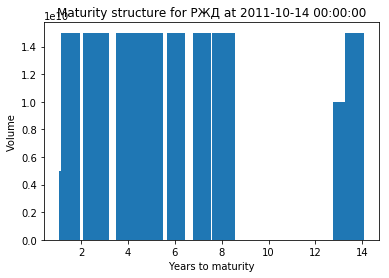

In [21]:
import matplotlib.pyplot as plt
Volume = OurBonds['SumMarketVal']
Days_to_maturity=OurBonds['time_to_maturity']
plt.bar(Days_to_maturity,Volume, width = 0.8, align = 'edge')
plt.xlabel('Years to maturity')
plt.ylabel('Volume')
plt.title('Maturity structure for '+str(OurIssuer) +' at ' + str(OurDate))
plt.show()

Для постороения круговой диаграммы необходимо сначала разбить данные на три группы по срочности. Определим те облигации, срок погашения которых меньше 5 и более 10 лет.

In [22]:
OurBonds['<5'] = OurBonds['time_to_maturity'] < 5

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
OurBonds['>10'] = OurBonds['time_to_maturity'] > 10

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Посчитаем суммарный объем в обращении для каждой группы.

In [24]:
a = OurBonds.loc[OurBonds['<5']== True, 'SumMarketVal'].sum()
b = OurBonds.loc[(OurBonds['<5']== False) & ((OurBonds['>10']== False)), 'SumMarketVal'].sum()
c = OurBonds.loc[OurBonds['>10']== True, 'SumMarketVal'].sum()

Объединим полученные объемы в один столбец и создадим столбец с названиями групп. На основе созданных столбцов можно делать круговую диаграмму.

In [25]:
Volumes = [a,b,c]
Groups = ['< 5 years', 'From 5 to 10 (incl.)', '> 10 years']

Создаем диаграмму. Добавляем название и определяем округление доли группы до 0,1%.

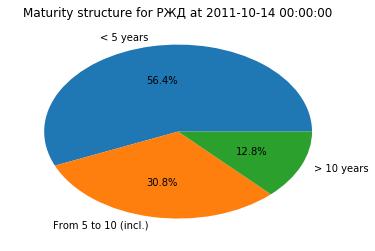

In [26]:
plt.pie( Volumes, labels= Groups, shadow=False, autopct='%1.1f%%',)
plt.title('Maturity structure for '+str(OurIssuer) +' at ' + str(OurDate))
plt.show()

Пункт c) выполнен. 
Пункт d) Представим таблицу с активными облигациями нашего эмитента.

In [27]:
OurBonds

,"ISIN, RegCode, NRDCode",IssuerName,SumMarketVal,EndMtyDate,BegDistDate,OurDate,SecurityType,CouponType,HaveOffer,CouponPerYear,Basis,FaceFTName,AmortisedMty,FaceValue,coupon,time_to_maturity,<5,>10
249,RU000A0GJNG2,РЖД,5.000000e+09,2012-11-07,2005-11-18,2011-10-14,Корп,Постоянный,0.0,2.0,act/365,RUB,0.0,1000.0,37.650000,1.068493,True,False
1002,RU000A0JQ136,РЖД,1.500000e+10,2013-11-13,2008-11-21,2011-10-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,27.023033,2.084932,True,False
1005,RU000A0JQ177,РЖД,1.500000e+10,2015-11-18,2008-11-28,2011-10-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,38.890045,4.098630,True,False
1029,RU000A0JQ4F1,РЖД,1.500000e+10,2014-03-06,2009-03-14,2011-10-14,Корп,Постоянный,0.0,2.0,act/365,RUB,0.0,1000.0,74.790000,2.394521,True,False
1030,RU000A0JQ4G9,РЖД,1.500000e+10,2014-03-06,2009-03-14,2011-10-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,12.332058,2.394521,True,False
1035,RU000A0JQ4U0,РЖД,1.500000e+10,2015-04-07,2009-04-16,2011-10-14,Корп,Постоянный,1.0,2.0,act/365,RUB,0.0,1000.0,42.320182,3.482192,True,False
1054,RU000A0JQ5Q5,РЖД,1.500000e+10,2019-05-16,2009-05-30,2011-10-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,43.214515,7.591781,False,False
1062,RU000A0JQ656,РЖД,1.500000e+10,2017-06-05,2009-06-17,2011-10-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,42.903457,5.646575,False,False
1077,RU000A0JQ6S9,РЖД,1.500000e+10,2016-06-20,2009-07-01,2011-10-14,Корп,Постоянный,1.0,2.0,act/365,RUB,0.0,1000.0,45.397030,4.687671,True,False
1088,RU000A0JQ7W9,РЖД,1.500000e+10,2018-07-16,2009-07-29,2011-10-14,Корп,Переменный,1.0,2.0,act/365,RUB,0.0,1000.0,47.466551,6.758904,False,False


На основе выведенной таблицы зададим ISIN интересующей нас облигации.

In [33]:
OurISIN=input() # введите ISIN одной из облигаций эмитента и нажмите ENTER

RU000A0JQ4F1


Пункт e). Из таблицы со всеми активными облигациями эмитента возьмем информацию об интересующей нас облигации.

In [34]:
OurBond = OurBonds[OurBonds['ISIN, RegCode, NRDCode'] == OurISIN]

In [35]:
OurBond

,"ISIN, RegCode, NRDCode",IssuerName,SumMarketVal,EndMtyDate,BegDistDate,OurDate,SecurityType,CouponType,HaveOffer,CouponPerYear,Basis,FaceFTName,AmortisedMty,FaceValue,coupon,time_to_maturity,<5,>10
1029,RU000A0JQ4F1,РЖД,1.500000e+10,2014-03-06,2009-03-14,2011-10-14,Корп,Постоянный,0.0,2.0,act/365,RUB,0.0,1000.0,74.79,2.394521,True,False


Представим информацию о типе данной облигации, виде купона и наличии оферт.

In [36]:
OurBond [['ISIN, RegCode, NRDCode', 'SecurityType' ,'CouponType', 'HaveOffer']]

,"ISIN, RegCode, NRDCode",SecurityType,CouponType,HaveOffer
1029,RU000A0JQ4F1,Корп,Постоянный,0.0


Построим структуру платежей по облигации, оставшихся от выбранной даты до даты погашения, если облигация имеет постоянный купон, не имеет аферты и не является амортизируемой.

In [37]:
if OurBond['CouponType'].all() == 'Постоянный' and OurBond['HaveOffer'].all() == 0 and OurBond['AmortisedMty'].all() == 0:
    structure = pd.DataFrame(data={'date': [], 'payment': []})
    from datetime import datetime, timedelta
    j = OurBond.loc[:,'EndMtyDate'].astype(object).all()
    i=0
    structure.at[i, 'date'] = j
    structure.at[i, 'payment'] = OurBond['coupon'] + OurBond['FaceValue']
    while j >= OurBond['OurDate'].astype(object).all():
        j -= timedelta(days=365/OurBond.loc[:,'CouponPerYear'].sum())
        i += 1
        structure.at[i, 'date'] = j
        structure.at[i, 'payment'] = OurBond['coupon']
    print(structure)
else:
    print('Облигация не подходит: тип ее купона не является постоянным, в облигацию встроена аферта или же она является амортизируемой')

                  date  payment
0  2014-03-06 00:00:00  1074.79
1  2013-09-04 12:00:00    74.79
2  2013-03-06 00:00:00    74.79
3  2012-09-04 12:00:00    74.79
4  2012-03-06 00:00:00    74.79
5  2011-09-05 12:00:00    74.79


Если предыдущая команда выдала "Облигация не подходит: тип ее купона не является постоянным, в облигацию встроена аферта или же она является амортизируемой", то стоит взять другую облигацию. Если же была выведена структура платежей, то облигация соответствует критериям и мы можем построить график. Тут возникает проблема, т.к. далеко не по всем облигациям есть данные по купону в таблице с результате торгов. Для того, чтобы понять, какие облигации удовлетворяют нашим критериям и имеют информацию о купонных выплатах, мы специально построили в sql сервере таблицу. С учетом всех осталось только чуть более 200 облигаций. 
Построим график платежей по облигации. Если же данных по купону нет, то график построить не получится и скрипт выдаст ошибку.

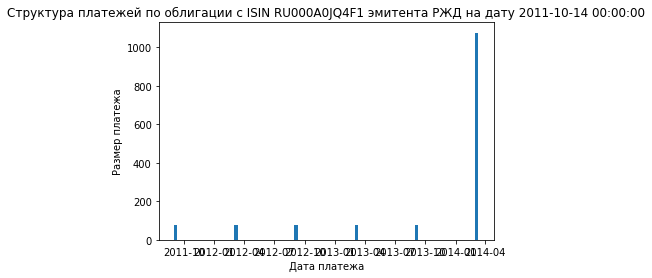

In [38]:
import matplotlib.pyplot as plt
plt.bar(structure['date'].values,structure['payment'].values, width= 10)
plt.xlabel('Дата платежа')
plt.ylabel('Размер платежа')
plt.title('Структура платежей по облигации с ISIN '+str(OurISIN)+' эмитента '+str(OurIssuer) +' на дату ' + str(OurDate))
plt.show()